In [100]:
import pandas as pd
import env
import matplotlib.pyplot as plt

DB_URL = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/tidy_data'

## Attendance

In [8]:
attendance_grades = {
    'P': 1,
    'T': .9,
    'H': .5,
    'A': 0
}

df = pd.read_sql('SELECT * FROM attendance', DB_URL)

In [3]:
df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [9]:
df = df.rename(columns={'Unnamed: 0': 'student'})
df = df.melt(id_vars='student', var_name='date', value_name='attendance')
df['grade'] = df.attendance.map(attendance_grades)
df

,student,date,attendance,grade
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9
5,Jane,2018-01-02,P,1.0
6,Billy,2018-01-02,T,0.9
7,John,2018-01-02,T,0.9
8,Sally,2018-01-03,T,0.9
9,Jane,2018-01-03,T,0.9


In [10]:
df.groupby('student').mean()

,grade
student,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


In [11]:
df.pivot_table(values='grade', index='student')

,grade
student,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


## Coffee Levels

In [12]:
df = pd.read_sql('SELECT * FROM coffee_levels', DB_URL)
df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [13]:
df.pivot_table('coffee_amount', 'hour', 'coffee_carafe')

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


## Cake Recipes

In [17]:
df = pd.read_sql('SELECT * FROM cake_recipes', DB_URL)

In [18]:
df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [19]:
recipe_and_position = df['recipe:position'].str.split(':', expand=True)
recipe_and_position.columns = ['recipe', 'position']
df = (
    pd.concat([df, recipe_and_position], axis=1)
    .drop(columns=['recipe:position'])
    .melt(id_vars=['recipe', 'position'], var_name='oven_temp', value_name='tastiness')
)

In [20]:
df.head()

,recipe,position,oven_temp,tastiness
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


Which recipe is the best on average?

In [21]:
df.groupby('recipe').tastiness.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: tastiness, dtype: float64

Which temperature is the best on average?

In [22]:
df.groupby('oven_temp').tastiness.mean()

oven_temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: tastiness, dtype: float64

Which combination of recipe, position, and temperature is the best?

In [23]:
df.sort_values(by='tastiness').tail(1)

,recipe,position,oven_temp,tastiness
26,b,bottom,300,99.248541


## Bonuses

In [67]:
pd.read_sql('SELECT * FROM billboard', DB_URL).head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,None,None,None,None,None,None,None,None,None,None
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,None,None,None,None,None,None,None,None,None,None
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,None,None,None,None,None,None,None,None,None,None
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,None,None,None,None,None,None,None,None,None,None


In [69]:
def wrangle_billboard_data():
    df = pd.read_sql('SELECT * FROM billboard', DB_URL)
    # deal with the 87 different week columns
    df = df.melt(id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='chart_pos')
    # convert to an integer type
    df.week = df.week.str[2:].astype(int)
    # drop nulls (nulls mean that the song wasn't in the top 100 for that week)
    df = df[df.chart_pos.notna()].copy()
    # np.nan is a float
    df.chart_pos = df.chart_pos.astype(int)
    # convert to a datetime and add the week delta to find the actual date
    df['date.entered'] = pd.to_datetime(df['date.entered'])
    df['date'] = df['date.entered'] + df.week.apply(lambda week: pd.Timedelta(f'{week} w'))
    df = df.drop(columns='date.entered')
    return df

In [70]:
df = wrangle_billboard_data()

In [72]:
df.week.mean()

11.470699076691163

In [77]:
df.set_index('date').loc['2000-03-04'].sort_values(by='chart_pos')

,year,artist,track,time,week,chart_pos
date,,,,,,
2000-03-04,2000,Savage Garden,I Knew I Loved You,4:07,19,1
2000-03-04,2000,"Carey, Mariah",Thank God I Found Yo...,4:14,12,2
2000-03-04,2000,Lonestar,Amazed,4:25,39,3
2000-03-04,2000,"Aguilera, Christina",What A Girl Wants,3:18,14,4
2000-03-04,2000,"Hill, Faith",Breathe,4:04,17,5
...,...,...,...,...,...,...
2000-03-04,2000,"McKnight, Brian",Stay Or Let It Go,4:32,1,95
2000-03-04,2000,"Williams, Robbie",Angels,3:56,15,96
2000-03-04,2000,Juvenile,U Understand,3:51,4,98


In [82]:
df = pd.read_sql('SELECT * FROM pew', DB_URL)
df = df.melt(id_vars='religion', var_name='income', value_name='n_respondants')

In [91]:
df.groupby('income').n_respondants.sum().sort_index().index

Index(['$10-20k', '$100-150k', '$20-30k', '$30-40k', '$40-50k', '$50-75k',
       '$75-100k', '<$10k', '>150k', 'Don't know/refused'],
      dtype='object', name='income')

In [96]:
# Pandas categorical type can support ordered categorical data that isn't ordered alphabetically or numerically
cats = ['<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k', '$50-75k', '$75-100k', '$100-150k', '>150k', "Don't know/refused"]
df.income = pd.Categorical(df.income, ordered=True, categories=cats)

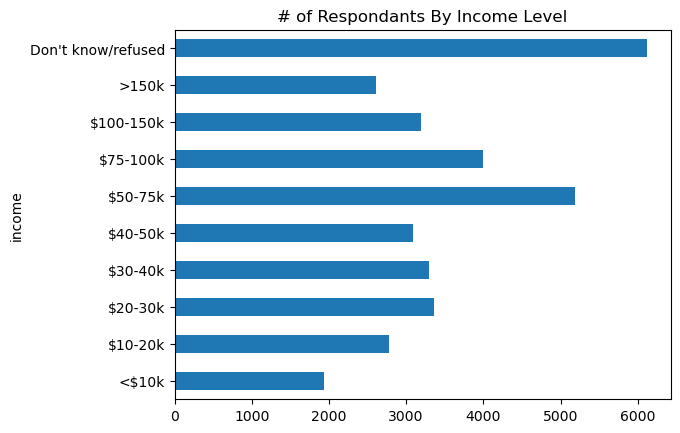

In [102]:
df.groupby('income').n_respondants.sum().sort_index().plot.barh(title='# of Respondants By Income Level')
plt.show()

In [106]:
df = pd.read_sql('SELECT * FROM weather', DB_URL)

In [109]:
df

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,None,29.9,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,None,10.7,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,None,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [125]:
df_melt = (
    df.drop(columns=['id', 'year'])
    .melt(id_vars=['month', 'element'], var_name='day')
    .dropna()
    .pivot_table('value', index=['day', 'month'], columns='element')
    .reset_index()
)
df_melt.columns.name = ''
df_melt.day = df_melt.day.str[1:].astype(int)
df_melt = df_melt.sort_values(by=['month', 'day'])[['month', 'day', 'tmin', 'tmax']]
df_melt = df_melt.reset_index(drop=True)
df_melt

,month,day,tmin,tmax
0,1,30,14.5,27.8
1,2,2,14.4,27.3
2,2,3,14.4,24.1
3,2,11,13.4,29.7
4,2,23,10.7,29.9
5,3,5,14.2,32.1
6,3,10,16.8,34.5
7,3,16,17.6,31.1
8,4,27,16.7,36.3
9,5,27,18.2,33.2


In [115]:
df_melt.groupby(['month', 'day']).size().reset_index()

,month,day,0
0,1,d30,2
1,2,d11,2
2,2,d2,2
3,2,d23,2
4,2,d3,2
5,3,d10,2
6,3,d16,2
7,3,d5,2
8,4,d27,2
9,5,d27,2
